[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figures 3.6, 3.13 and 3.21, and 3.23

Analysis of height data from the US army\
Topics: Cumulative distribution function, quantiles, probability density function, histogram, kernel density estimation, box plot, Gaussian distribution, maximum likelihood estimation, parametric and nonparametric models

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm

data = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')
print(data.columns)

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)


Number of data: 4082
Median: 175.5
First quartile: 171.0
Third quartile: 180.2


([<matplotlib.axis.YTick at 0x29e491390>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00')])

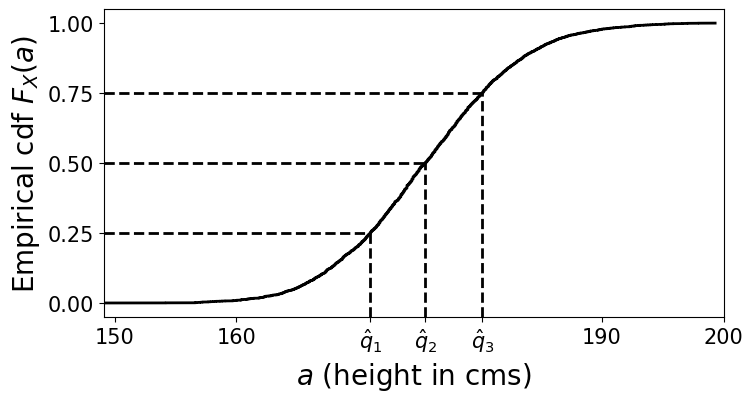

In [19]:
def empirical_cdf(x):
    x_sorted = np.sort(x)
    cdf = np.arange(1, len(x_sorted)+1) / float(len(x_sorted))
    return x_sorted, cdf

stature = data['stature'] / 10.
sorted_stature, cdf = empirical_cdf(stature) 

median = np.median(stature)
first_quartile = np.percentile(stature,25)
third_quartile = np.percentile(stature,75)

print("Number of data: " + str(len(stature)))
print("Median: " + str(median))
print("First quartile: " + str(first_quartile))
print("Third quartile: " + str(third_quartile))

font_size = 20
font_size_legend = 15
font_size_ticks = 15

x_min = sorted_stature[0]
x_max = sorted_stature[-1]
y_min = -0.05
y_max = 1.05
plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.step(sorted_stature,cdf,linewidth=2,color="black")
plt.hlines(0.25,x_min,first_quartile,linewidth=2,ls='dashed',color="black")
plt.vlines(first_quartile,y_min,0.25,linewidth=2,ls='dashed',color="black")
plt.hlines(0.5,x_min,median,linewidth=2,ls='dashed',color="black")
plt.vlines(median,y_min,0.5,linewidth=2,ls='dashed',color="black")
plt.hlines(0.75,x_min,third_quartile,linewidth=2,ls='dashed',color="black")
plt.vlines(third_quartile,y_min,0.75,linewidth=2,ls='dashed',color="black")
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$a$ (height in cms)',fontsize=font_size)
plt.ylabel(r'Empirical cdf $F_{X}(a)$',fontsize=font_size)
plt.xticks([150,160,first_quartile,median,third_quartile,190,200],
           labels=["150","160","$\hat{q}_1$","$\hat{q}_2$","$\hat{q}_3$","190","200"])
plt.yticks([0,0.25,0.5,0.75,1])

([], [])

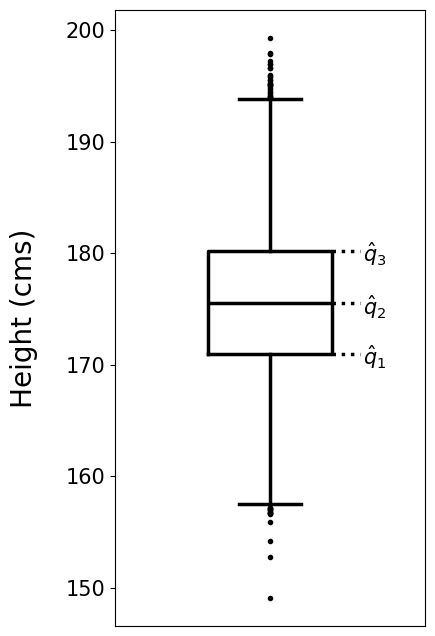

In [20]:
plt.figure(figsize=(4,8))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
dots = dict(markerfacecolor='black', marker='.')
median_props = dict(color='black', lw=2.5)
plt.ylabel('Height (cms)',fontsize=font_size,labelpad=20)
ax = plt.boxplot( stature,flierprops=dots,medianprops=median_props,whiskerprops=median_props,
                 capprops=median_props,boxprops=median_props,widths=0.4)
plt.hlines(first_quartile,1.2,1.29,linewidth=2.5,ls='dotted',color="black")
plt.hlines(median,1.2,1.29,linewidth=2.5,ls='dotted',color="black")
plt.hlines(third_quartile,1.2,1.29,linewidth=2.5,ls='dotted',color="black")
plt.text(1.3,first_quartile-1,r'$\hat{q}_1$',fontsize=font_size_ticks)
plt.text(1.3,median-1,r'$\hat{q}_2$',fontsize=font_size_ticks)
plt.text(1.3,third_quartile-1,r'$\hat{q}_3$',fontsize=font_size_ticks)
plt.xticks([])

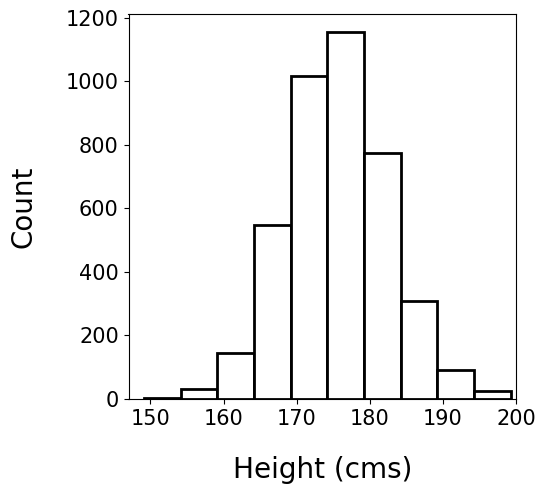

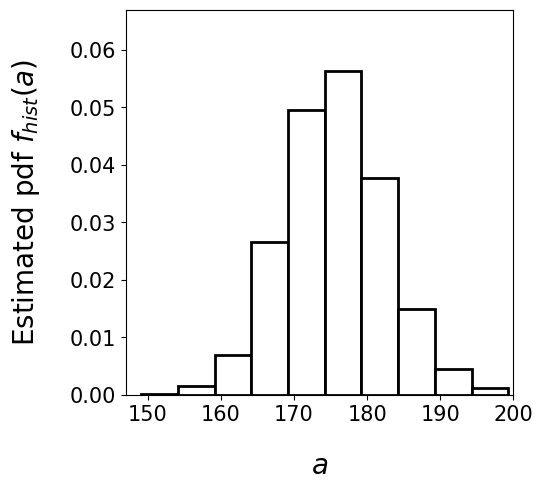

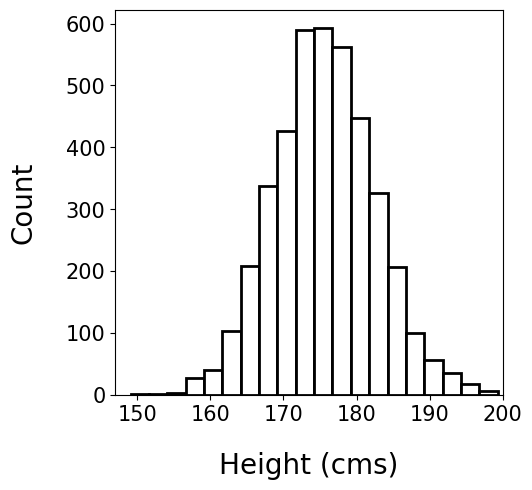

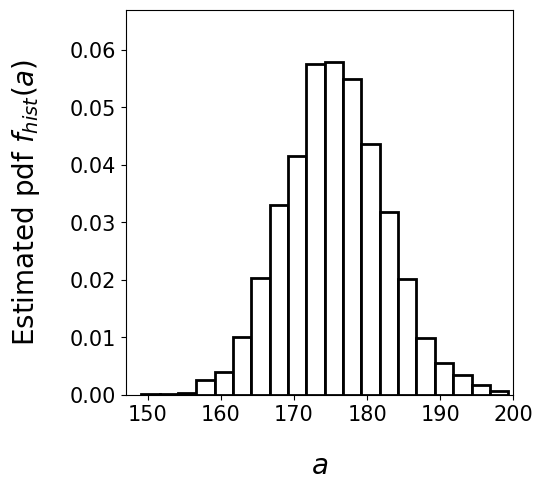

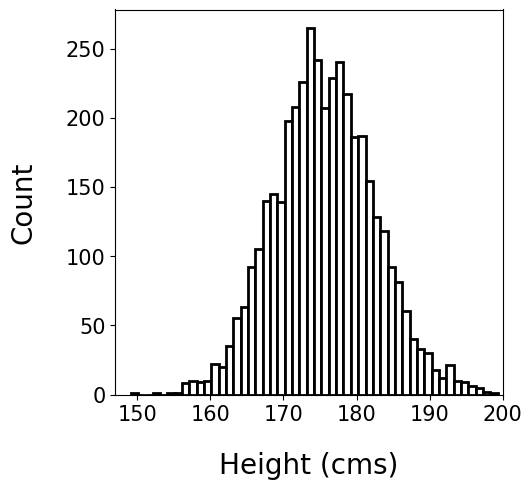

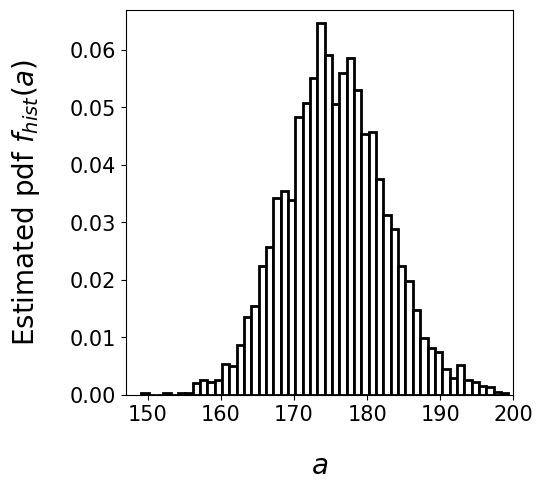

In [21]:
n_bins = [10,20,50]
x_min = 147
x_max = 200
y_max = 0.067

for n in n_bins:

    plt.figure(figsize=(5,5))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(stature,bins=n,color='white', edgecolor='black',
              linewidth=2)
    plt.xlim([x_min,x_max])
    plt.ylabel("Count",fontsize=font_size,labelpad=20)
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad=20)
    
    plt.figure(figsize=(5,5))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(stature,bins=n,color='white', edgecolor='black',
              linewidth=2,density=True)
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max])
    plt.ylabel(r"Estimated pdf $f_{hist}(a)$",
               fontsize=font_size,labelpad=20)
    plt.xlabel('$a$',fontsize=font_size,labelpad=20)

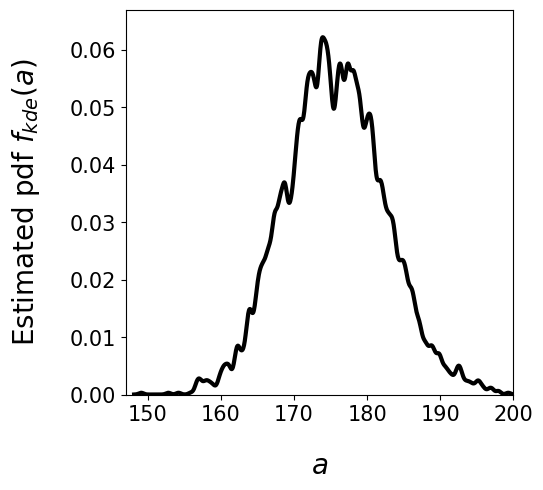

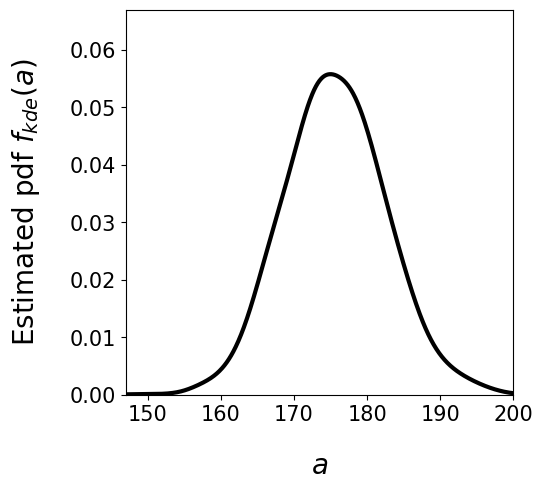

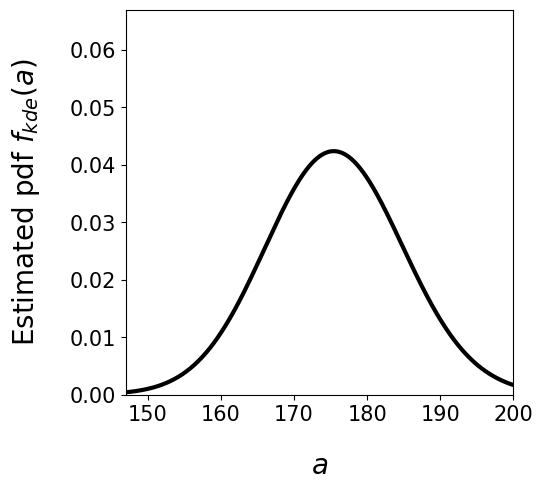

In [22]:
bw_vals = [0.25,1.5,5]
for index,bw in enumerate(bw_vals):

    plt.figure(figsize=(5,5))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    sns.kdeplot(stature,bw_adjust=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max])
    plt.ylabel(r"Estimated pdf $f_{kde}(a)$",fontsize=font_size,labelpad=20)
    plt.xlabel('$a$',fontsize=font_size,labelpad=20)

ML parameter estimate: mu = 175.6
ML parameter estimate: sigma = 6.85


Text(0.5, 1.0, 'Maximum likelihood parameter estimates')

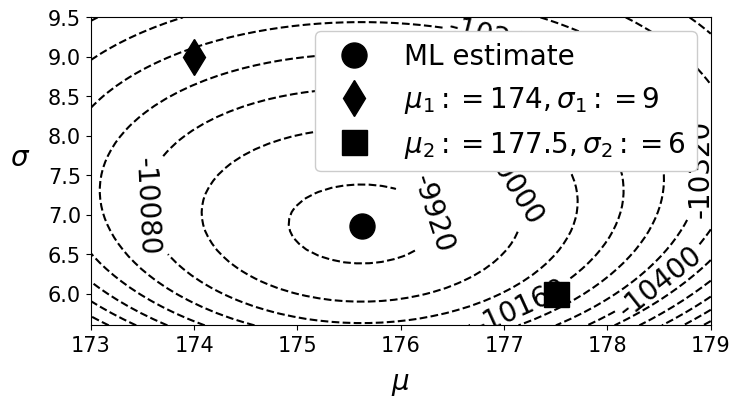

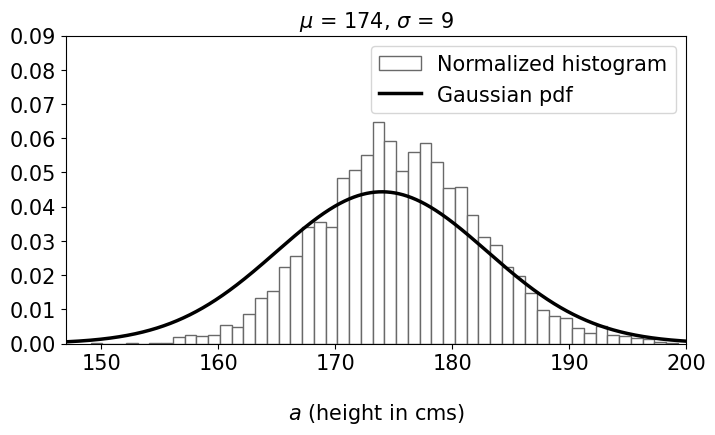

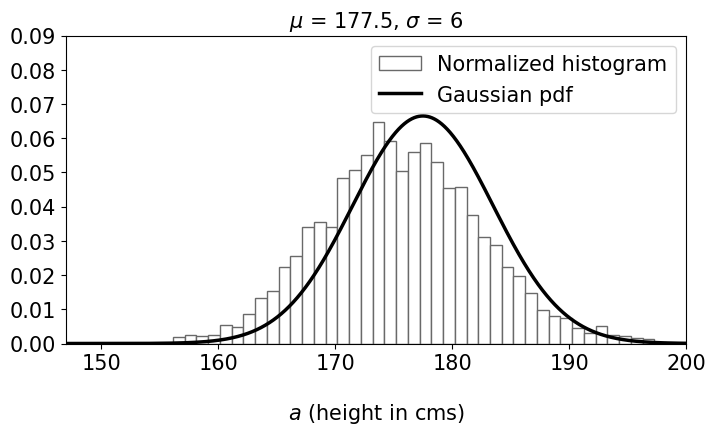

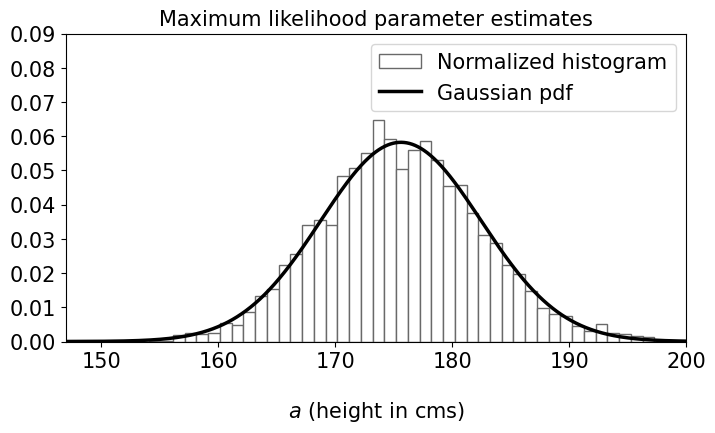

In [27]:
# Gaussian parametric model
def log_likelihood(mu, sigma, x):
    n = len(x)
    llk = np.zeros(mu.shape)
    for i in range(llk.shape[0]):
        for j in range(llk.shape[1]):
            llk[i,j] =  - n * np.log(sigma[i,j]) - np.sum((x - mu[i,j]) **2 ) / 2 / sigma[i,j] **2  
    return llk

mu_ml = np.mean(stature)
sigma_ml = np.std(stature)

print("ML parameter estimate: mu = {:0.1f}".format(mu_ml))
print("ML parameter estimate: sigma = {:0.2f}".format(sigma_ml))

mu_mesh, sigma_mesh = np.mgrid[173:179:50j,5.6:9.5:50j]
log_likelihood_vals = log_likelihood(mu_mesh, sigma_mesh, stature)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

mu_1 = 174
sigma_1 = 9
mu_2 = 177.5
sigma_2 = 6

m_size = 18

plt.figure(figsize=(8,4))
ax = plt.axes()
# plt.axis("equal")
CS = plt.contour(mu_mesh, sigma_mesh, log_likelihood_vals, 50, levels=12,colors='black')
plt.plot(mu_ml, sigma_ml, "o",markerfacecolor='black',markeredgecolor="black", lw=2,markersize=m_size, label='ML estimate')
plt.plot(mu_1, sigma_1, "d",markerfacecolor='black',markeredgecolor="black", lw=2,markersize=m_size, label=r'$\mu_1 := 174, \sigma_1 := 9$')
plt.plot(mu_2, sigma_2, "s",markerfacecolor='black',markeredgecolor="black", lw=2,markersize=m_size, label=r'$\mu_2 := 177.5, \sigma_2 := 6$')
plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks) 
plt.xlabel("$\mu$", fontsize=font_size,labelpad=10)  
plt.ylabel("$\sigma$", fontsize=font_size,labelpad=20, rotation=0)  
plt.legend(fontsize=font_size,numpoints=1,framealpha=1)

step = 0.01
h=np.arange(x_min,x_max+step,step)

y_max_aux = 0.09
plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature,bins=n,color='white', edgecolor='dimgray',
          linewidth=1,density=True,label='Normalized histogram')
plt.plot(h,norm.pdf(h,mu_1,sigma_1),lw=2.5,color="black",label='Gaussian pdf')
plt.ylim([0,y_max_aux])
plt.xlim([x_min,x_max])
plt.xlabel('$a$ (height in cms)',fontsize=font_size_legend,labelpad=20)
plt.legend(fontsize=font_size_legend)
plt.title('$\mu$ = ' +str(mu_1)+', $\sigma$ = ' +str(sigma_1),fontsize=font_size_legend)

plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature,bins=n,color='white', edgecolor='dimgray',
          linewidth=1,density=True,label='Normalized histogram')
plt.plot(h,norm.pdf(h,mu_2,sigma_2),lw=2.5,color="black",label='Gaussian pdf')
plt.ylim([0,y_max_aux])
plt.xlim([x_min,x_max])
plt.xlabel('$a$ (height in cms)',fontsize=font_size_legend,labelpad=20)
plt.legend(fontsize=font_size_legend)
plt.title('$\mu$ = ' +str(mu_2)+', $\sigma$ = ' +str(sigma_2),fontsize=font_size_legend)

plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature,bins=n,color='white', edgecolor='dimgray',
          linewidth=1,density=True,label='Normalized histogram')
plt.plot(h,norm.pdf(h,mu_ml,sigma_ml),lw=2.5,color="black",label='Gaussian pdf')
plt.ylim([0,y_max_aux])
plt.xlim([x_min,x_max])
plt.xlabel('$a$ (height in cms)',fontsize=font_size_legend,labelpad=20)
plt.legend(fontsize=font_size_legend)
plt.title('Maximum likelihood parameter estimates',fontsize=font_size_legend)